## Sidenotes
- Includes feature selection notes from lesson 11 Intro to Machine Learning, and other notes from p1 course material.

### Important Reading
- [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html) by Scott Fortmann-Roe.

__Learning curve quiz complete but not understood__, read over:
- `sklearn.learning_curve`.[__`learning_curve()`__](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html)
- Sklearn Example: [Plotting Learning Curves](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#example-model-selection-plot-learning-curve-py)
- [User Guide](http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves) 3.5. Validation curves: plotting scores to evaluate models

# Contents
1. Bias & Variance
- Learning Curves & Model Complexity
- Representative Power of a Model (Curse of Dimensionality)
- Feature Selection
    1. Univariate Feature Selection (`SelectPercentile`, `SelectKBest`)
    - Feature Selection in TfIdf Vectorizer
    - Regularization (Lasso Regression in sklearn)

# Bias & Variance

## Error due to Bias, i.e. underfitting

High bias algorithm pays _too little_ attention to data, not effected much by data (i.e. oversimplified)
- characterized by _high error_ on training set, i.e. low r<sup>2</sup> / large SSE or sum of squared (residual) errors
- _common when:_ too few features used in model

Bias measures a model's ability to represent the complexity of the underlying data.
- Common when there is enough data but not enough features, not rich enough
- As a result, the model consistently and systematically misrepresents the data, leading to low accuracy in prediction, i.e. _underfitting_ to data.

Simply put, __bias occurs when we have an inadequate model__, as in the following examples:
- An example might be when we have objects that are classified by color and shape, for example easter eggs, but our model can only partition and classify objects by color. It would therefore consistently mislabel the easter eggs -- for example labeling rainbows as easter eggs because they are colorful.
- Another example would be continuous data that is polynomial in nature, with a model that can only represent linear relationships. In this case it does not matter how much data we feed the model because it cannot represent the underlying relationship. To overcome error from bias, we need a more complex model.


    

## Error due to Variance, i.e. overfitting

High variance algorithm pays _too much_ attention to data, does not generalize well, i.e. it overfits to the data
- characterized by _much higher error_ on test set than training (some variance between the two is expected).
- _common when:_ carefully minimized SSE, with too many features i.e. overfit to data

Variance in this sense is a measure of how much the predictions vary for any given test sample.
- A certain amount of variance is normal when training a model with randomly selected subsets of data
- Too much variance indicates that the model is unable to generalize its predictions to the larger population, low precision score.
- High sensitivity to the training set is also known as _overfitting_, and generally occurs when:
    - the model is too complex
    - there is not enough data to support it.
- To reduce the variability of a model's predictions by:
    - training on more data
    - limiting the model's complexity.

## Trade-off: quality of model vs. no. of features
To minimize bias and variance, we must find the right level of model complexity, balancing:
- the performance/accuracy of the model on the training data
    - (without overfitting)
- with as few features as possible.
    - (while maintaining algorithm's performance)
    
In addition to the subset of data chosen for training, what features you use from a given dataset can also greatly affect the bias and variance of your model.

For more info, read [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html) by Scott Fortmann-Roe.
    
## Visualizing Overfitting
### An Overfit Regression
- Blue points are training data
- Red points are test data
![An Overfit Regression](causes_of_error_images/overfit_regression.png)

# Learning Curves and Model Complexity

## Learning Curves in Machine Learning

- A graph that compares the performance of a model on training and testing data over a varying number of training instances.
- The performance of a model should generally improve as the number of training points increases.
- By separating training and testing sets and graphing performance on each separately, we can get a better idea of how well the model can generalize to unseen data.
- A learning curve allows us to verify when a model has learned as much as it can about the data. When this occurs, the performance on both training and testing sets plateau and there is a consistent gap between the two error rates.

### Bias
- When the training and testing errors converge and are quite high this usually means the model is biased. 
- No matter how much data we feed it, the model cannot represent the underlying relationship and therefore has systematic high errors.

### Variance
- When there is a large gap between the training and testing error this generally means the model suffers from high variance. 
- Unlike a biased model, models that suffer from variance generally require more data to improve. 
- We can also limit variance by simplifying the model to represent only the most important features of the data.

### Ideal Learning Curve
- The ultimate goal for a model is one that has good performance that generalizes well to unseen data. 
- In this case, both the testing and training curves converge at similar values. 
    - The smaller the gap between the training and testing sets, the better our model generalizes. 
    - The better the performance on the testing set, the better our model performs.
    

## Model Complexity

Validation curves in sklearn:
- `sklearn.learning_curve.`[__`validation_curve()`__](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.validation_curve.html) documentation
- [User Guide](http://scikit-learn.org/stable/modules/learning_curve.html#validation-curve): 3.5.1. Validation curve

The visual technique of graphing performance is not limited to learning. With most models, we can change the complexity by changing the inputs or parameters.

A model complexity graph looks at training and testing curves as the model's complexity varies. __The most common trend is that as a model's complexity increases, bias will fall off and variance will rise.__

Sklearn provides a tool for validation curves which can be used to monitor model complexity by varying the parameters of a model. We'll explore the specifics of how these parameters affect complexity in the next course on supervised learning.

## Learning Curves and Model Complexity

So what is the relationship between learning curves and model complexity?

If we were to take the learning curves of the same machine learning algorithm with the same fixed set of data, but create several graphs at different levels of model complexity, all the learning curve graphs would fit together into a 3D model complexity graph.

If we took the final testing and training errors for each model complexity and visualized them along the complexity of the model we would be able to see how well the model performs as the model complexity increases.

## Practical use of Model Complexity

Knowing that we can identify issues with bias and variance by analyzing a model complexity graph, we now have a visual tool to help identify ways to optimize our models.

This will be one of the core tools we use in the upcoming project.

In the final section, we will introduce cross validation and grid search, which will give us a concrete, systematic way of searching through different levels of complexity to find the optimal model that complexity and learning curves give us a holistic understanding of.

# Quiz: Noisy Data, Complex Model

_(correct, maybe.. but not understood)_

- Graph plotted changes with each run. (Not sure exactly what the graph means, and what it's varying plots mean.)

0.999999999624


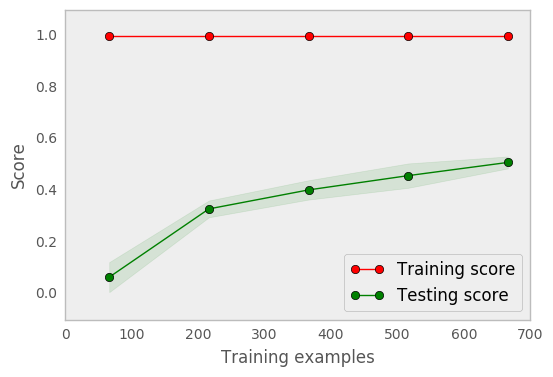

In [1]:
# In this exercise we'll examine a learner which has high variance,
# and tries to learn nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve 
# to plot learning curves of both training and testing error. 
# Use plt.plot() within the plot_curve function
# to create line graphs of the values.

# parts of code taken from plot_learning_curve.py sklearn example
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # YOUR CODE HERE
    reg = DecisionTreeRegressor()
    reg.fit(X,y)
    print reg.score(X,y)

    # TODO: Create the learning curve with the cv and score parameters defined above.
    train_sizes, train_scores, test_scores = learning_curve(
        DecisionTreeRegressor(), X, y, cv=cv, scoring=score)
    
    # TODO: Plot the training and testing curves.
    plt.figure()
    # plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    

    # Show the result, scaling the axis for visibility
    plt.ylim(-.1,1.1)
    plt.show()
    
plot_curve()

# Representative Power of a Model

## Curse of Dimensionality

__Rule:__ As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially.
- Very related to __feature selection__

(don't quite understand example)
- "We are talking about data points in a k nearest neighbor method..."
- "Isn't just an issue for KNN, true in general... Think of it as points that are representing or covering the space... And coverage is necessary for learning. Applies to all of ML."

![curse of dimensionality](causes_of_error_images/curse_of_dimensionality.png)

# Feature Selection

## Why Feature Selection?

"Make everything as simple as possible, but no simpler" - Albert Einstein

Two major things aspects:
1. Select best features, leaving out unecessary data
- Adding new features to explore data, using intuition

## Ignoring features

__Reasons to ignore a feature__
- Too much noise, hard to dinstinguish whether it is reliably measuring what you want it to be measuring, i.e. data is not accurate/reliable enough.
- Causes overfitting for some reason
- Highly correlated with/strong related to a feature that is already present, breaking the model because mathematics stops working.
- Unecessarily slows down training/testing process when feature is clearly not useful.

## Features != Information

__definition:__ Features vs. Information
- A feature is a characteristic of particular data point that is attempting to _access_ information
    - In general, we want bare minimum number of features that give as much information as possible
- Can think of features as quantity vs. information as quality.

## Feature selection tools in sklearn

- Feature reduction a.k.a dimensionality reduction
- Very important to be skeptical of features, esp. with high _dimensionality data_
- In example in tools/email_preprocess.py described below, 90% of features we ignored with:
    - insignificant impact on the classifier's accuracy, and 
    - performance improved in terms of the _time complexity_ of the classifier algorithm.

### Univariate Feature Selection

There are several go-to methods of automatically selecting your features in sklearn. Many of them fall under the umbrella of univariate feature selection, which treats each feature independently and asks how much _power_ it gives you in classifying or regressing.

There are two big univariate feature selection tools in sklearn:
- `SelectPercentile` and `SelectKBest`. 
- The difference is pretty apparent by the names:
    - SelectPercentile selects the X% of features that are most powerful (where X is a parameter)
    - SelectKBest selects K number of features that are most powerful (where K is a parameter).

A clear candidate for feature reduction is text learning, since _the data has such high dimension_. We actually did feature selection in the Sara/Chris email classification problem during the first few mini-projects; you can see it in the code in tools/email_preprocess.py:
```python
from sklearn.feature_selection import SelectPercentile, f_classif
...
...
### feature selection, because text is super high dimensional and 
### can be really computationally chewy as a result
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train_transformed, labels_train)
features_train_transformed = selector.transform(
    features_train_transformed).toarray()
features_test_transformed  = selector.transform(
    features_test_transformed).toarray()
```

### Feature Selection in TfIdf Vectorizer

- NOTE: Usually not a good idea to mix univariate feature selection and Feature Selection with TfIdf Vectorizer parameter `max_df`

Example from tools/email_preprocess.py:
```python
### text vectorization--go from strings to lists of numbers
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                               stop_words='english')
features_train_transformed = vectorizer.fit_transform(features_train)
features_test_transformed  = vectorizer.transform(features_test)
```
"`max_df=0.5`" parameter means that words with a document frequency of more than 0.5 will be removed.
- i.e. words that occur in more than 50% of the documents are not included as features
- used because words that are probably too common to be very 'powerful', does not provide 'access' to information.

### Regularization (Lasso Regression)

__definition:__ automatically penalizing extra features in model

![Regularization graph](causes_of_error_images/regularization_graph.png)


__Lasso Regression (type of regularized regression)__


`sklearn.linear_model`.Lasso [Documentation][lasso_doc] and [User Guide][lasso_user]
- Mathematical optimization of the bias-variance trade-off
- Minimizes SSE like basic regression
- But also minimizes term (penalty parameter * coefficients of regression)
    - coefficients of regression describe/are related to no. of features
    - if feature does not add enough precision, it's coefficient is set to 0
        - simpler algorithm with this method since it can run through the formula in-place.
- This means that any loss from an additional feature must be offset by the gain in precision by adding that feature.

   
![Lasso regression formula](causes_of_error_images/lasso_regression_formula.png)
![Lasso regression penalty method](causes_of_error_images/lasso_regression_penalty_method.png)

[lasso_doc]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

[lasso_user]: http://scikit-learn.org/stable/modules/linear_model.html#lasso